In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/한국어 깃헙

/content/drive/MyDrive/한국어 깃헙


['happy', 'sad', 'InActive angry', 'Active angry', 'InActive dislike', 'Active dislike', 'InActive fear', 'Active fear', 'contempt', 'InActive surprise', 'Active surprise', 'neutral']
[ 8  4  2  6  9  1 11  7  5  3 10  0]
Ranking by Softmax Probability:
Rank 1: Contempt (Probability: 0.1037)
Rank 2: Inactive dislike (Probability: 0.0992)
Rank 3: Inactive angry (Probability: 0.0892)
Rank 4: Inactive fear (Probability: 0.0864)
Rank 5: Inactive surprise (Probability: 0.0860)
Rank 6: Sad (Probability: 0.0817)
Rank 7: Neutral (Probability: 0.0814)
Rank 8: Active fear (Probability: 0.0754)
Rank 9: Active dislike (Probability: 0.0752)
Rank 10: Active angry (Probability: 0.0748)
Rank 11: Active surprise (Probability: 0.0743)
Rank 12: Happy (Probability: 0.0727)


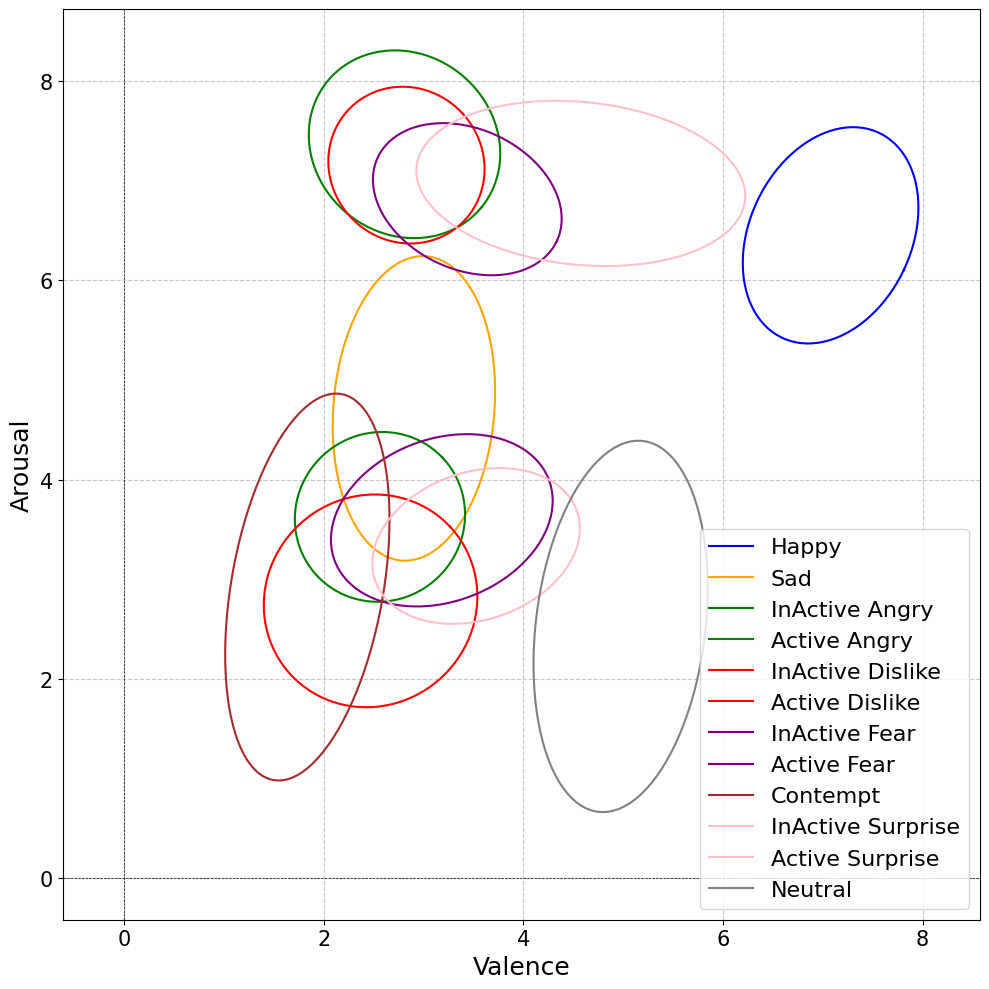

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# CSV 파일 읽기
data = pd.read_csv('키워드 데이터/keyword(final).csv', encoding = 'utf-8')

# 데이터를 7:3 비율로 train 및 test로 나누기
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# 감정 리스트
emotions = ['happy', 'sad', 'angry', 'dislike', 'fear', 'contempt', 'surprise', 'neutral']

# 감정별 색상 지정
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# 시각화 설정
plt.figure(figsize=(10, 10))

xlim = (0, 10)
ylim = (0, 10)

input_valence = 1

input_arousal =1

distances = []

#거리 계산 후 저장 및 최종 감정 저장 리스트
emotions_result=[]
emotion_ellipse_center={}

for i, emotion in enumerate(emotions):
    emotion_data = train_data[train_data['Emotion'] == emotion]
    valence_mean = emotion_data['Valence'].mean()
    arousal_mean = emotion_data['Arousal'].mean()
    valence_std = emotion_data['Valence'].std()
    arousal_std = emotion_data['Arousal'].std()

    # 회전각 계산
    rho = np.corrcoef(emotion_data['Valence'], emotion_data['Arousal'])[0, 1]
    rotation_angle = 0.5 * np.arctan(2 * rho * valence_std * arousal_std / (valence_std**2 - arousal_std**2))

    # 타원 파라미터 계산
    center_x = valence_mean
    center_y = arousal_mean
    radius_x = valence_std
    radius_y = arousal_std

    # 타원 좌표 생성
    t = np.linspace(0, 2*np.pi, 100)
    x = center_x + radius_x * np.cos(t) * np.cos(rotation_angle) - radius_y * np.sin(t) * np.sin(rotation_angle)
    y = center_y + radius_x * np.cos(t) * np.sin(rotation_angle) + radius_y * np.sin(t) * np.cos(rotation_angle)

    # 나눈 부분의 비율 계산
    total_arousal = emotion_data['Arousal']
    total_valence = emotion_data['Valence']

    active_low_arousal = total_arousal[(total_arousal >= 1) & (total_arousal <= 5)]
    active_low_valence = total_valence[(total_arousal >= 1) & (total_arousal <= 5)]

    active_high_arousal = total_arousal[(total_arousal >= 6) & (total_arousal <= 10)]
    active_high_valence = total_valence[(total_arousal >= 6) & (total_arousal <= 10)]

    ratio_low = len(active_low_arousal) / len(total_arousal)
    ratio_high = len(active_high_arousal) / len(total_arousal)

    # "InActive" 영역의 타원 파라미터 계산
    center_x_inactive = active_low_valence.mean()
    center_y_inactive = active_low_arousal.mean()
    radius_x_inactive = active_low_valence.std()
    radius_y_inactive = active_low_arousal.std()

    # "Active" 영역의 타원 파라미터 계산
    center_x_active = active_high_valence.mean()
    center_y_active = active_high_arousal.mean()
    radius_x_active = active_high_valence.std()
    radius_y_active = active_high_arousal.std()

    # "InActive" 영역의 회전각도 계산
    rho_inactive = np.corrcoef(active_low_valence, active_low_arousal)[0, 1]
    rotation_angle_inactive = 0.5 * np.arctan(2 * rho_inactive * radius_x_inactive * radius_y_inactive / (radius_x_inactive**2 - radius_y_inactive**2))

    # "Active" 영역의 회전각도 계산
    rho_active = np.corrcoef(active_high_valence, active_high_arousal)[0, 1]
    rotation_angle_active = 0.5 * np.arctan(2 * rho_active * radius_x_active * radius_y_active / (radius_x_active**2 - radius_y_active**2))

    # "InActive" 영역의 타원 좌표 생성
    x_low_arousal = center_x_inactive + radius_x_inactive * np.cos(t) * np.cos(rotation_angle_inactive) - radius_y_inactive * np.sin(t) * np.sin(rotation_angle_inactive)
    y_low_arousal = center_y_inactive + radius_x_inactive * np.cos(t) * np.sin(rotation_angle_inactive) + radius_y_inactive * np.sin(t) * np.cos(rotation_angle_inactive)

    # "Active" 영역의 타원 좌표 생성
    x_high_arousal = center_x_active + radius_x_active * np.cos(t) * np.cos(rotation_angle_active) - radius_y_active * np.sin(t) * np.sin(rotation_angle_active)
    y_high_arousal = center_y_active + radius_x_active * np.cos(t) * np.sin(rotation_angle_active) + radius_y_active * np.sin(t) * np.cos(rotation_angle_active)

    # "InActive" 영역의 타원 그리기
    if 0.3 <= ratio_low <= 0.7:
        plt.plot(x_low_arousal, y_low_arousal, color=colors[i], label=f'InActive {emotion.capitalize()}')
        # 타원 내부를 원하는 색상으로 채우기 위한 데이터
        theta = np.linspace(0, 2*np.pi, 1000)  # 0부터 2*pi까지의 각도 범위를 생성합니다.
        r = np.sqrt(x_low_arousal**2 + y_low_arousal**2)  # 타원의 반지름을 계산합니다.

        # 타원 내부를 원하는 색상으로 채웁니다.
        #plt.fill(theta, r, color=colors[i], alpha=0.5)
        #타원 그리면서 입력값과 중심 거리도 같이 출력
        distance = np.sqrt((input_valence - center_x_inactive)**2 + (input_arousal - center_y_inactive)**2)
        distances.append(distance)
        emotions_result.append(f'InActive {emotion}')
        emotion_ellipse_center[f'InActive {emotion}'] = {center_x_inactive, center_y_inactive}



    # "Active" 영역의 타원 그리기
    if 0.3 <= ratio_high <= 0.7:
        plt.plot(x_high_arousal, y_high_arousal, color=colors[i], label=f'Active {emotion.capitalize()}')
        #plt.fill_between(x_high_arousal, 0, y_high_arousal, color=colors[i], alpha=1)
        distance = np.sqrt((input_valence - center_x_active)**2 + (input_arousal - center_y_active)**2)
        distances.append(distance)
        emotions_result.append(f'Active {emotion}')
        emotion_ellipse_center[f'Active {emotion}'] = {center_x_active, center_y_inactive}


    # 타원 그리기
    if not (0.3 <= ratio_low <= 0.7) and not (0.3 <= ratio_high <= 0.7):
        plt.plot(x, y, color=colors[i], label=f'{emotion.capitalize()}')
        #plt.fill_between(x, 0, y, color=colors[i], alpha=1)
        distance = np.sqrt((input_valence - center_x)**2 + (input_arousal - center_y)**2)
        distances.append(distance)
        emotions_result.append(emotion)
        emotion_ellipse_center[emotion] = {center_x_inactive, center_y_inactive}


print(emotions_result)
# 거리의 역수 계산
inverse_distances = [1 / d for d in distances]

# 소프트맥스 함수를 사용하여 확률 계산
softmax_values = np.exp(inverse_distances) / sum(np.exp(inverse_distances))

# 랭킹 계산
ranking = np.argsort(softmax_values)[::-1]  # 높은 순서로 정렬된 인덱스

print(ranking)

# 랭킹 출력
print("Ranking by Softmax Probability:")
for rank, emotion_index in enumerate(ranking):
    emotion = emotions_result[emotion_index]
    probability = softmax_values[emotion_index]
    print(f"Rank {rank + 1}: {emotion.capitalize()} (Probability: {probability:.4f})")




#plt.scatter(input_valence, input_arousal, color='red', marker='x', label='Input Emotion')
plt.xlabel('Valence', fontsize=18)
plt.ylabel('Arousal', fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [5]:
#저장된 타원 중심값 확인
emotion_ellipse_center

{'happy': {3.813804173354735, 6.430176565008026},
 'sad': {2.8083017183664363, 3.863423343003794},
 'InActive angry': {2.5626043405676127, 3.6249304396215916},
 'Active angry': {2.808550185873606, 3.6249304396215916},
 'InActive dislike': {2.4686765857478465, 2.782693813625685},
 'Active dislike': {2.782693813625685, 2.828199566160521},
 'InActive fear': {3.1825044404973357, 3.5908081705150976},
 'Active fear': {3.4380637402285026, 3.5908081705150976},
 'contempt': {1.7184210526315788, 2.1666666666666665},
 'InActive surprise': {3.3334619837900425, 3.5260517174835972},
 'Active surprise': {3.3334619837900425, 4.57541412380122},
 'neutral': {1.9034724248613948, 4.851707032389846}}

In [15]:
import pandas as pd
import numpy as np

# 결과 데이터를 저장할 리스트
result_data = []

# 각 텍스트에 대한 감정 분류 수행
for index, row in test_data.iterrows():
    valence = row['Valence']
    arousal = row['Arousal']
    emotions = row["Emotion"]

    distances = {}  # 각 감정과의 거리를 저장할 딕셔너리

    for emotion, center_coords in emotion_ellipse_center.items():
        center_valence, center_arousal = center_coords

        # 타원 중심과의 거리 계산
        distance = np.sqrt((valence - center_valence)**2 + (arousal - center_arousal)**2)

        distances[emotion] = distance

    # 역수를 취하여 거리가 가까울수록 확률이 높아지도록 함
    inverse_distances = {emotion: 1 / distance for emotion, distance in distances.items()}

    # 소프트맥스 함수를 사용하여 확률을 정규화
    softmax_values = {emotion: np.exp(val) / sum(np.exp(v) for v in inverse_distances.values()) for emotion, val in inverse_distances.items()}

    #-	softmax를 이용한 confidence 구하기 ( 선택에 대한 확신이 어느정도 인지 )
    #ex) sad의 softmax값 0.6 이고 second-emotion값이 0.1 이었다면
    #0.6 – 0.1 =0.5 의 역수 취해서 confidence를 구한다.
    #1~10의 값으로 나오게 하고 싶다면, *10해서 정량화



    # 가장 확률이 높은 감정 찾기
    top_emotion = max(softmax_values, key=softmax_values.get)
    top_probability = softmax_values[top_emotion]

    # 두번째로 확률이 높은 감정 찾기
    # 먼저 top_emotion을 제외한 감정을 필터링한 후, 그 중에서 가장 확률이 높은 감정을 찾습니다.
    second_emotion = max((emotion, prob) for emotion, prob in softmax_values.items() if emotion != top_emotion)
    second_emotion_name, second_emotion_probability = second_emotion

    confidence = (top_probability - second_emotion_probability)
    confidence = confidence*10 # Confidence 값을 0에서 1 사이로 제한


    # 결과 데이터에 추가
    result_data.append({
        'Text': row['Text'],
        'Emotion': emotions,
        'Arousal': arousal,
        'Valence': valence,
        'Top_Emotion': top_emotion,
        'Top_Probability': top_probability,
        'Second_Emotion': second_emotion,
        'Second_Probability': second_emotion_probability,
        'Confidence': confidence
    })

# 결과 데이터프레임 생성
result_df = pd.DataFrame(result_data)

# 결과 데이터프레임 출력 또는 저장
result_df

,Text,Emotion,Arousal,Valence,Top_Emotion,Top_Probability,Second_Emotion,Second_Probability,Confidence
0,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,neutral,1,4,Active dislike,0.093417,"(sad, 0.08070086927437704)",0.080701,0.127163
1,다음주에 엄마 생일이잖아. 잊은 건 아니지?,surprise,2,5,InActive fear,0.098744,"(sad, 0.08116990857896553)",0.081170,0.175740
2,우와 그림 잘 그리시나봐요.,neutral,1,5,InActive fear,0.091160,"(sad, 0.0818605722642641)",0.081861,0.092999
3,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,2,2,contempt,0.521304,"(sad, 0.040144681207718934)",0.040145,4.811597
4,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",sad,7,3,happy,0.156217,"(sad, 0.07848391553569813)",0.078484,0.777329
...,...,...,...,...,...,...,...,...,...
22957,아까 문-이과 통합 사례에 대해 말씀하셨는데요,neutral,1,5,InActive fear,0.091160,"(sad, 0.0818605722642641)",0.081861,0.092999
22958,나 지금 핸드폰으로 게임 할거야.,neutral,6,6,happy,0.099757,"(sad, 0.08262269148729075)",0.082623,0.171339
22959,아빠 나 좋은 소식이 있어.,happy,7,8,happy,0.089319,"(sad, 0.08312812142522458)",0.083128,0.061911
22960,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",surprise,3,3,Active dislike,0.494715,"(sad, 0.041459571963516996)",0.041460,4.532552


In [16]:
def map_value(confidence):
    if 0 <= confidence < 1:
        return 1
    elif 1 <= confidence < 2:
        return 2
    elif 2 <= confidence < 3:
        return 3
    elif 3 <= confidence < 4:
        return 4
    elif 4 <= confidence <= 5:
        return 5
    elif 5 <= confidence <= 6:
        return 6
    elif 6 <= confidence <= 7:
        return 7
    elif 7 <= confidence <= 8:
        return 8
    elif 8 <= confidence <= 9:
        return 9
    elif 9 <= confidence <= 10:
        return 10
    else:
        return None

In [17]:
result_df['Confidence'] = result_df['Confidence'].apply(map_value)

In [18]:
# "Top_Emotion" 열의 값을 수정하여 "Active+" 또는 "Inactive+"를 제외한 감정 값만 남기는 함수
def extract_emotion(value):
    if "InActive" in value:
        return value.replace("InActive ", "")
    elif "Active" in value:
        return value.replace("Active ", "")
    else:
        return value

# "Top_Emotion" 열의 값을 수정하여 감정 값만 남기기
result_df['Top_Emotion'] = result_df['Top_Emotion'].apply(extract_emotion)


In [19]:
# Confidence 피처의 분포 확인
confidence_values = result_df['Confidence']

print(confidence_values.describe())

count    22962.000000
mean         1.877537
std          1.731178
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: Confidence, dtype: float64


In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_true = lb.fit_transform(result_df['Emotion'])  # 실제 감정
y_pred = lb.transform(result_df['Top_Emotion'])  # 예측한 감정


auc = roc_auc_score(y_true, y_pred, average='macro')  # 'macro' 평균 사용

print("Multi-Class AUC:", auc)

Multi-Class AUC: 0.5950911938375661


In [23]:
result_df.loc[(result_df['Top_Emotion'] == 0), 'Top_Emotion'] = "fear"  # fear = 0
result_df.loc[(result_df['Top_Emotion'] == 1), 'Top_Emotion'] = "surprise"  # surprise = 1
result_df.loc[(result_df['Top_Emotion'] == 2), 'Top_Emotion'] = "angry"  # angry = 2
result_df.loc[(result_df['Top_Emotion'] == 3), 'Top_Emotion'] = "sad"  # sad = 3
result_df.loc[(result_df['Top_Emotion'] == 4), 'Top_Emotion'] = "neutral"  # neutral = 4
result_df.loc[(result_df['Top_Emotion'] == 5), 'Top_Emotion'] = "happy"  # happy = 5
result_df.loc[(result_df['Top_Emotion'] == 6), 'Top_Emotion'] = "dislike"  # dislike = 6
result_df.loc[(result_df['Top_Emotion'] == 7), 'Top_Emotion'] = "contempt" # contempt = 7

In [24]:
data

,Text,Emotion,Arousal,Valence,Keyword(final)
0,뭘 생각해!,fear,8,3,생각해
1,"엄마의 경험이 나보다 더 많겠지만, 엄마의 시대의 경험과 지금 나의 경험이 다를 수...",happy,5,6,엄마
2,"너, 무작정 하는 자퇴가 아니라면 자퇴 후에 어떻게 살 생각인데?",fear,5,5,하는 자퇴가
3,나 학교 자퇴하는 거 말이야. 생각할 시간이 필요하다며.,neutral,1,6,말이야
4,"아무리 그래도, 사회가 돌아가는 방식 자체가 변하는 건 아니야.",neutral,1,5,아무리
...,...,...,...,...,...
76532,그래도 하루 고생하면 지구 반대편을 구경할 수 있잖아요. 할아버지는 에펠탑 궁금하지...,happy,7,7,그래도
76533,여권 쓸 일이 없는데 뭣하러 해?,fear,6,3,일이 없는데
76534,늙은이가 어디 돌아다녀서 뭐해.,dislike,5,3,늙은이
76535,그러면 저랑 할머니랑 다녀올 테니까 할아버지는 집에서 금붕어 밥 잘~ 주고 계세요.,neutral,7,7,할머니랑 다녀올


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_true = lb.fit_transform(result_df['Emotion'])  # 실제 감정
y_pred = lb.transform(data['Top1_Emotion'])  # 예측한 감정


auc = roc_auc_score(y_true, y_pred, average='macro')  # 'macro' 평균 사용

print("Multi-Class AUC:", auc)

ValueError: ignored

In [ ]:
# Top_Emotion 피처에서 각 감정의 개수를 세기
emotion_counts = test_kobert_data['Top1_Emotion'].value_counts()

print("Top_Emotion 예측된 감정별 개수:")
print(emotion_counts)

Top_Emotion 예측된 감정별 개수:
neutral     9458
fear        3475
sad         2869
happy       2693
dislike     1787
surprise    1464
angry       1003
contempt     213
Name: Top1_Emotion, dtype: int64


In [ ]:
# 'confidence' 피처 생성
test_kobert_data['Confidence'] = (test_kobert_data['Top1_Probability'] - test_kobert_data['Top2_Probability']) * 10

# 결과 출력
print(test_kobert_data)

                                                    Text Top1_Emotion  \
33296             안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.          sad   
61689                           다음주에 엄마 생일이잖아. 잊은 건 아니지?         fear   
64030                                    우와 그림 잘 그리시나봐요.        happy   
55513  할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...      dislike   
18151             미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?          sad   
...                                                  ...          ...   
46058                          아까 문-이과 통합 사례에 대해 말씀하셨는데요      neutral   
5133                                  나 지금 핸드폰으로 게임 할거야.      neutral   
15308                                    아빠 나 좋은 소식이 있어.        happy   
40233      어머, 나는 안 돼. 법에 걸려.        그런거 안 하셔도 된다고 말씀드려.        angry   
70696            비슷해! 나리는 동굴에 달린 고드름을 타고 동굴 천장에 딱 붙어있었어.      neutral   

       Top1_Probability  Top2_Emotion  Top2_Probability  Confidence  
33296          0.437695             6          0.3721

In [ ]:
test_kobert_data['Confidence'] = test_kobert_data['Confidence'].apply(map_value)

In [ ]:
test_kobert_data

,Text,Top1_Emotion,Top1_Probability,Top2_Emotion,Top2_Probability,Confidence
33296,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,sad,0.437695,6,0.372112,1
61689,다음주에 엄마 생일이잖아. 잊은 건 아니지?,fear,0.589144,3,0.220591,4
64030,우와 그림 잘 그리시나봐요.,happy,0.492635,1,0.466444,1
55513,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,0.519552,2,0.375340,2
18151,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",sad,0.966817,0,0.010987,10
...,...,...,...,...,...,...
46058,아까 문-이과 통합 사례에 대해 말씀하셨는데요,neutral,0.979355,0,0.006048,10
5133,나 지금 핸드폰으로 게임 할거야.,neutral,0.949466,5,0.040361,10
15308,아빠 나 좋은 소식이 있어.,happy,0.652431,4,0.333596,4
40233,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",angry,0.448718,0,0.348696,2


In [ ]:
count_above_3 = len(test_kobert_data[test_kobert_data['Confidence'] >= 1])
print(count_above_3)

count_above_3 = len(result_df[result_df['Confidence'] >= 1])
print(count_above_3)

19216
4422


In [ ]:
result_df

,Text,Emotion,Arousal,Valence,Top_Emotion,Top_Probability,Second_Emotion,Second_Probability,Confidence
0,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,neutral,1,4,dislike,0.093417,"(sad, 0.08070086927437704)",0.080701,1
1,다음주에 엄마 생일이잖아. 잊은 건 아니지?,surprise,2,5,fear,0.098744,"(sad, 0.08116990857896553)",0.081170,1
2,우와 그림 잘 그리시나봐요.,neutral,1,5,fear,0.091160,"(sad, 0.0818605722642641)",0.081861,1
3,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,2,2,contempt,0.521304,"(sad, 0.040144681207718934)",0.040145,5
4,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",sad,7,3,happy,0.156217,"(sad, 0.07848391553569813)",0.078484,1
...,...,...,...,...,...,...,...,...,...
22957,아까 문-이과 통합 사례에 대해 말씀하셨는데요,neutral,1,5,fear,0.091160,"(sad, 0.0818605722642641)",0.081861,1
22958,나 지금 핸드폰으로 게임 할거야.,neutral,6,6,happy,0.099757,"(sad, 0.08262269148729075)",0.082623,1
22959,아빠 나 좋은 소식이 있어.,happy,7,8,happy,0.089319,"(sad, 0.08312812142522458)",0.083128,1
22960,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",surprise,3,3,dislike,0.494715,"(sad, 0.041459571963516996)",0.041460,5


In [ ]:
test_kobert_data

,Text,Top1_Emotion,Top1_Probability,Top2_Emotion,Top2_Probability
15612,뭐? 이 녀석이…?,fear,0.830046,1,0.082502
53347,어딨지~~?,neutral,0.728510,5,0.196468
11076,"아, 병원에서 그렇게 말했던거야? 갑자기 그런 거야?",surprise,0.698852,0,0.247618
15069,안쓰럽긴 한데.. 그래도 연휴에 이런 문자는 안 보냈으면 좋겠어.,dislike,0.486470,3,0.222164
56714,언니 오늘도 힘들었죠?,sad,0.885664,4,0.065631
...,...,...,...,...,...
44780,우리 아들 언제 이렇게 다 컸대? 기특하네.,surprise,0.889721,5,0.082853
63943,"일단 학점관리 잘하고, 아직 3학년이면 나중에 걱정해.",neutral,0.878712,5,0.044532
5133,나 지금 핸드폰으로 게임 할거야.,neutral,0.891673,5,0.095748
15308,아빠 나 좋은 소식이 있어.,happy,0.890298,4,0.098663


In [ ]:
# Top_Emotion 피처에서 각 감정의 개수를 세기
emotion_counts = result_df['Top_Emotion'].value_counts()

print("Top_Emotion 예측된 감정별 개수:")
print(emotion_counts)

Top_Emotion 예측된 감정별 개수:
happy       8172
fear        7873
dislike     2687
sad         1354
contempt    1169
surprise     996
angry        608
neutral      103
Name: Top_Emotion, dtype: int64


In [ ]:
result_df.to_csv("result_df.csv", encoding = "utf-8-sig")

In [ ]:
filtered_df.to_csv("filtered_df.csv", encoding = "utf-8-sig")

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# 예측 결과를 저장한 열을 가져옵니다.
actual_emotion = result_df['Emotion']
predicted_emotion = result_df['Top_Emotion']

# 정확도 계산
accuracy = accuracy_score(actual_emotion, predicted_emotion)

# 혼동 행렬 계산
confusion = confusion_matrix(actual_emotion, predicted_emotion)

# 정밀도 계산
precision = precision_score(actual_emotion, predicted_emotion, average='weighted')

# 재현율 계산
recall = recall_score(actual_emotion, predicted_emotion, average='weighted')

# F1 스코어 계산
f1 = f1_score(actual_emotion, predicted_emotion, average='weighted')

# 결과 출력
print(f'정확도: {accuracy:.2f}')
#print(f'혼동 행렬:\n{confusion}')
print(f'정밀도: {precision:.2f}')
print(f'재현율: {recall:.2f}')
print(f'F1 스코어: {f1:.2f}')


정확도: 0.22
정밀도: 0.17
재현율: 0.22
F1 스코어: 0.16


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# 예측 결과를 저장한 열을 가져옵니다.
actual_emotion = result_df['Emotion']
predicted_emotion = test_kobert_data['Top1_Emotion']

# 정확도 계산
accuracy = accuracy_score(actual_emotion, predicted_emotion)

# 혼동 행렬 계산
confusion = confusion_matrix(actual_emotion, predicted_emotion)

# 정밀도 계산
precision = precision_score(actual_emotion, predicted_emotion, average='weighted')

# 재현율 계산
recall = recall_score(actual_emotion, predicted_emotion, average='weighted')

# F1 스코어 계산
f1 = f1_score(actual_emotion, predicted_emotion, average='weighted')

# 결과 출력
print(f'정확도: {accuracy:.2f}')
#print(f'혼동 행렬:\n{confusion}')
print(f'정밀도: {precision:.2f}')
print(f'재현율: {recall:.2f}')
print(f'F1 스코어: {f1:.2f}')


정확도: 0.52
정밀도: 0.51
재현율: 0.52
F1 스코어: 0.52
